In [66]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [67]:
import ktrain
from ktrain import text

In [ ]:
######download data set form: https://ai.stanford.edu/~amaas/data/sentiment/
## here folder renamed to bertimdb under the dcouments

In [69]:
DATADIR = 'documents/bertimdb'
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(DATADIR, 
                                                                         max_features=80000, maxlen=2000, 
                                                                         ngram_range=3, 
                                                                         preprocess_mode='standard',
                                                                         classes=['pos', 'neg'])

detected encoding: utf-8
language: en
Word Counts: 88582
Nrows: 25000
25000 train sequences
Average train sequence length: 237
Adding 3-gram features
max_features changed to 5151281 with addition of ngrams
Average train sequence length with ngrams: 709
x_train shape: (25000,2000)
y_train shape: (25000,2)
25000 test sequences
Average test sequence length: 229
Average test sequence length with ngrams: 523
x_test shape: (25000,2000)
y_test shape: (25000,2)


In [70]:
text.print_text_classifiers()


fasttext: a fastText-like model (http://arxiv.org/pdf/1607.01759.pdf)
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model (http://www.aclweb.org/anthology/P12-2018)
bigru: Bidirectional GRU with pretrained word vectors (https://arxiv.org/abs/1712.09405)
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (https://arxiv.org/abs/1810.04805)


In [71]:
model = text.text_classifier('nbsvm', (x_train, y_train), preproc=preproc)


Is Multi-Label? False
compiling word ID features...
maxlen is 2000
building document-term matrix... this may take a few moments...
rows: 1-10000
rows: 10001-20000
rows: 20001-25000
computing log-count ratios...
done.


In [72]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))


In [73]:
learner.lr_find()


simulating training for different learning rates... this may take a few moments...
Train on 25000 samples
Epoch 1/1024
25000/25000 [==============================] - 103s 4ms/sample - loss: 0.6629 - acc: 0.6897
Epoch 2/1024
19776/25000 [======================>.......] - ETA: 21s - loss: 0.2605 - acc: 0.9495

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


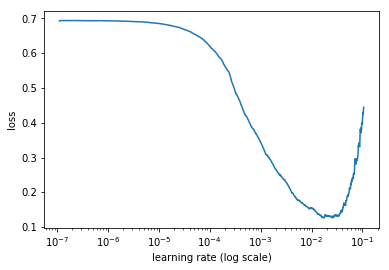

In [74]:
learner.lr_plot()


In [75]:
learner.fit(0.001, 3, cycle_len=1, cycle_mult=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/7
25000/25000 [==============================] - 110s 4ms/sample - loss: 0.2201 - acc: 0.9443 - val_loss: 0.2558 - val_acc: 0.9173
Epoch 2/7
25000/25000 [==============================] - 105s 4ms/sample - loss: 0.0487 - acc: 0.9929 - val_loss: 0.2298 - val_acc: 0.9210
Epoch 3/7
25000/25000 [==============================] - 105s 4ms/sample - loss: 0.0102 - acc: 0.9999 - val_loss: 0.2278 - val_acc: 0.9213
Epoch 4/7
25000/25000 [==============================] - 105s 4ms/sample - loss: 0.0085 - acc: 0.9999 - val_loss: 0.2205 - val_acc: 0.9217
Epoch 5/7
25000/25000 [==============================] - 105s 4ms/sample - loss: 0.0040 - acc: 1.0000 - val_loss: 0.2183 - val_acc: 0.9213
Epoch 6/7
25000/25000 [==============================] - 106s 4ms/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 0.2176 - val_acc: 0.9212
Epoch 7/7
25000/25000 [==============================] - 103s 4ms/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 0.

In [76]:
predictor = ktrain.get_predictor(learner.model, preproc)


In [115]:
data = [ 'This movie was boring.',
         'The film uses dupe artists.',
        'The actress uses overmakeup',
        'acting was not over',
        'We can give 10 out of 10 for this movie',
       'We can give 1 out of 10 for this movie']

In [116]:
predictor.predict(data)


['neg', 'neg', 'neg', 'pos', 'pos', 'neg']

In [117]:
predictor.predict(data, return_proba=True)


array([[0.6399735 , 0.36002645],
       [0.50863534, 0.49136463],
       [0.50169444, 0.4983056 ],
       [0.4883059 , 0.5116941 ],
       [0.3266692 , 0.6733308 ],
       [0.8071193 , 0.19288069]], dtype=float32)